# Task1

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent
    """
    def __init__(self, learning_rate=0.001, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0
        self.theta_1 = 0
        self.sse_history = []  

    def fit(self, x, y):
        n = len(x)
        for _ in range(self.n_iters):
            y_pred = self.theta_0 + self.theta_1 * x

            
            d_theta_0 = (-2/n) * np.sum(y - y_pred)
            d_theta_1 = (-2/n) * np.sum((y - y_pred) * x)  
            
            self.theta_0 -= d_theta_0 * self.learning_rate
            self.theta_1 -= d_theta_1 * self.learning_rate

            sse = np.sum((y - y_pred) ** 2)
            self.sse_history.append(sse)

    def predict(self, x):
        return self.theta_0 + self.theta_1 * x
    
    def plot_training(self, X, y):
        plt.figure(figsize=(12,4))
        
        plt.subplot(1,2,1)
        plt.plot(self.sse_history)  
        plt.title('SSE over iterations')
        plt.xlabel('Iteration')
        plt.ylabel('SSE')
        
        plt.subplot(1,2,2)
        plt.scatter(X, y, color='red')
        x_line = np.linspace(min(X), max(X), 100)
        y_line = self.predict(x_line)
        plt.plot(x_line, y_line, color='blue')
        plt.title('Regression line')
        plt.xlabel('X')
        plt.ylabel('y')
        
        plt.show()

    # Bouns
    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)
    

In [47]:
x = np.array([50, 60, 70, 80, 90])
y = np.array([150, 180, 210, 240, 270])
model = LinearRegressionGD(learning_rate=0.001, n_iters=500)
model.fit(x, y)
print(f"theta_0 = {model.theta_0:.4f}")
print(f"theta_1 = {model.theta_1:.4f}")

theta_0 = nan
theta_1 = nan


C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_6608\3944231526.py:24: RuntimeWarning: overflow encountered in square
  sse = np.sum((y - y_pred) ** 2)
d:\somethinges\courses\DEPI\ONL4_AIS2_S2..v2\env\Lib\site-packages\numpy\_core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_6608\3944231526.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  self.theta_1 -= d_theta_1 * self.learning_rate


In [48]:
pred = model.predict(np.array([70]))
print(f"Predicted price for 70 m²: {pred[0]:.2f} ")

Predicted price for 70 m²: nan 


d:\somethinges\courses\DEPI\ONL4_AIS2_S2..v2\env\Lib\site-packages\matplotlib\ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


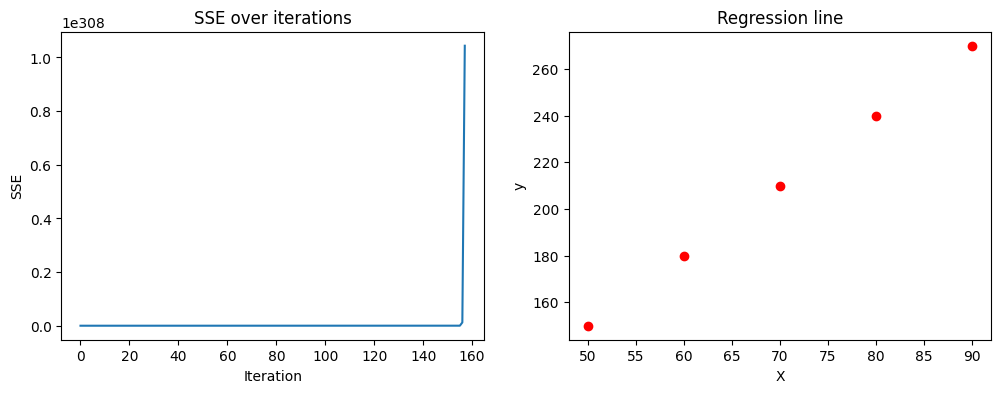

In [49]:
model.plot_training(x, y)

C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_6608\3944231526.py:24: RuntimeWarning: overflow encountered in square
  sse = np.sum((y - y_pred) ** 2)


Big LR - theta_1: -2.007459532378114e+301
Small LR - theta_1: 2.9993713328364127


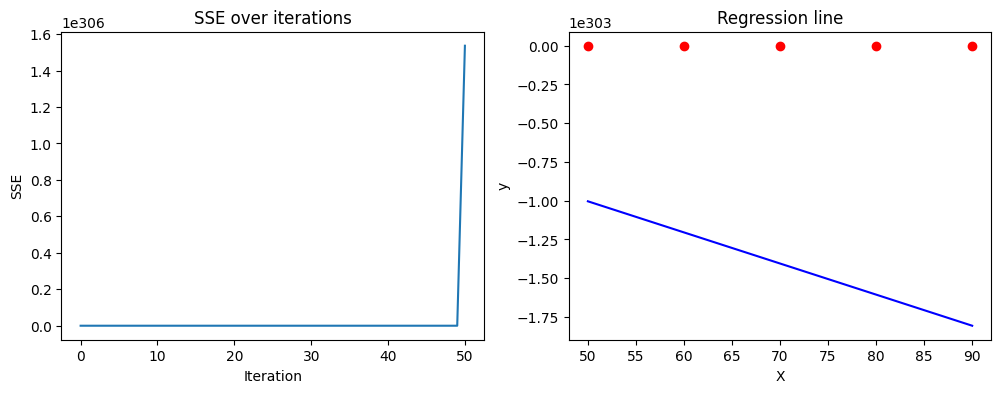

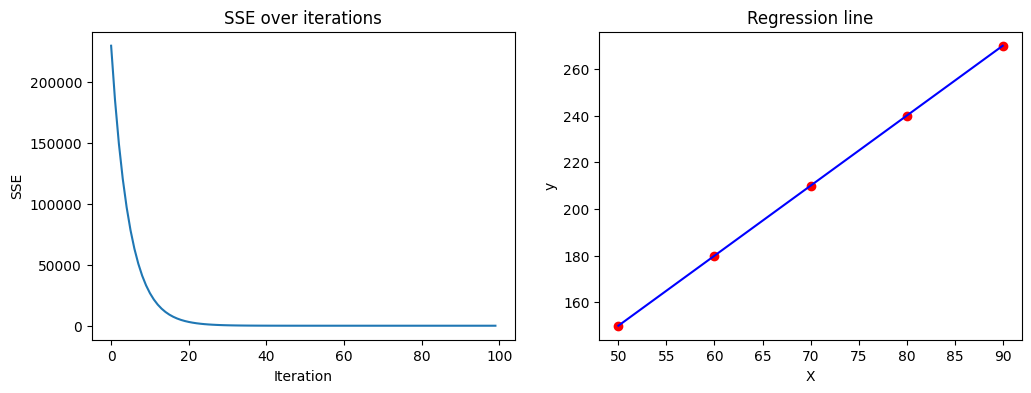

In [50]:
model_big = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_big.fit(x, y)

model_small = LinearRegressionGD(learning_rate=0.00001, n_iters=100)
model_small.fit(x, y)

print("Big LR - theta_1:", model_big.theta_1)
print("Small LR - theta_1:", model_small.theta_1)
model_big.plot_training(x, y)
model_small.plot_training(x, y)

### Bouns


In [51]:
print(f"MSE: {model.mse(x, y):.4f}")#big
print(f"MSE: {model_big.mse(x, y):.4f}")#so big
print(f"MSE: {model_small.mse(x, y):.4f}")#good

MSE: nan
MSE: inf
MSE: 0.0001


C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_6608\3944231526.py:53: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)


In [52]:
def normalize(X):
        return (X - np.mean(X)) / np.std(X)

In [53]:
x_norm = normalize(x)


model_raw = LinearRegressionGD(learning_rate=0.00001, n_iters=100)
model_raw.fit(x, y)

model_norm = LinearRegressionGD(learning_rate=0.00001, n_iters=100)
model_norm.fit(x_norm, y)

print("Raw - theta_1:", model_raw.theta_1, "MSE:", model_raw.mse(x, y))
print("Norm - theta_1:", model_norm.theta_1, "MSE:", model_norm.mse(x_norm, y))

Raw - theta_1: 2.9993713328364127 MSE: 8.712014832720324e-05
Norm - theta_1: 0.08476886431297276 MSE: 45716.76488219419


In [54]:
print(f"MSE: {model_raw.mse(x, y):.4f}")
print(f"MSE: {model_norm.mse(x_norm, y):.4f}")

MSE: 0.0001
MSE: 45716.7649


In [55]:
class LinearRegressionGD_Multi:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.theta = None
        self.sse_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_b = np.c_[np.ones(n_samples), X]
        self.theta = np.zeros(n_features + 1)
        
        for _ in range(self.n_iters):
            y_pred = X_b @ self.theta
            gradient = (2/n_samples) * X_b.T @ (y_pred - y)
            self.theta -= self.lr * gradient
            
            sse = np.sum((y - y_pred) ** 2)
            self.sse_history.append(sse)
    
    def predict(self, X):
        X_b = np.c_[np.ones(X.shape[0]), X]
        return X_b @ self.theta
    
    def mse(self, X, y):
        return np.mean((y - self.predict(X)) ** 2)
    
    def plot_training(self):
        plt.plot(self.sse_history)
        plt.title('SSE over iterations')
        plt.xlabel('Iteration')
        plt.ylabel('SSE')
        plt.show()

Predicted price: 7169.50
Theta: [ 76.69542041 102.59985384 -44.59194457]
MSE: 17.11518899253598


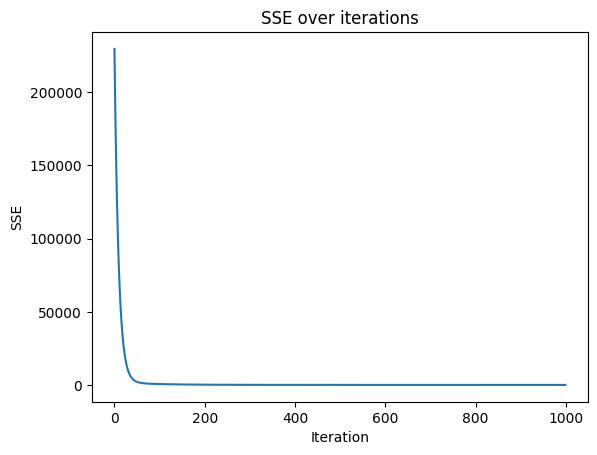

In [57]:
X_multi = np.array([
    [50, 10],
    [60, 20],
    [70, 20],
    [80, 30],
    [90, 30]
])
y = np.array([150, 180, 210, 240, 270])

X_multi_norm = normalize(X_multi)

model_multi = LinearRegressionGD_Multi(learning_rate=0.01, n_iters=1000)
model_multi.fit(X_multi_norm, y)


pred = model_multi.predict(np.array([[70, 2]]))
print(f"Predicted price: {pred[0]:.2f}")

print("Theta:", model_multi.theta)
print("MSE:", model_multi.mse(X_multi_norm, y))

model_multi.plot_training()

In [58]:
#finish